In [1]:
import numpy as np # algebra liniowa
import pandas as pd # czytanie plików csv
import matplotlib.pyplot as plt
import random as rnd

# Biblioteki do wizualizacji danych
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importowanie bilbiotek do uczenia maszynowego
from sklearn import metrics, svm
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
# wczytywanie plików csv
pokemon_df = pd.read_csv('pokemon.csv')
combats_df = pd.read_csv('combats.csv')
test_df = pd.read_csv('tests.csv')
prediction_df = test_df.copy()

In [3]:
pokemon_df.head(10)   # wyświelenie pierwszych 10 elemtów tabeli

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


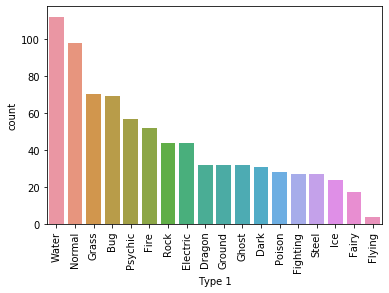

In [4]:
# zliczanie i obrazowanie typów pokemonów
sns.countplot(x='Type 1', data=pokemon_df, order=pokemon_df['Type 1'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

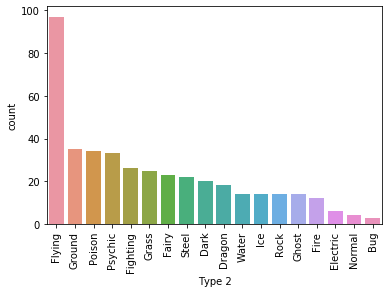

In [5]:
# zlicznie i obrazowanie rodzajów pokemonów
sns.countplot(x='Type 2', data=pokemon_df, order=pokemon_df['Type 2'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [6]:
# obliczanie statystyk pokemonów
pokemon_df['Total_stats'] = pokemon_df['HP'] + pokemon_df['Attack'] + pokemon_df['Defense'] + pokemon_df['Sp. Atk'] + pokemon_df['Sp. Def'] + pokemon_df['Speed']
print(pokemon_df.iloc[:, [1, -1]].head(10))

               Name  Total_stats
0         Bulbasaur          318
1           Ivysaur          405
2          Venusaur          525
3     Mega Venusaur          625
4        Charmander          309
5        Charmeleon          405
6         Charizard          534
7  Mega Charizard X          634
8  Mega Charizard Y          634
9          Squirtle          314


In [7]:
# obliczanie średnich statystyk pokemonów
mean_stats = pokemon_df['Total_stats'].mean()
print(mean_stats)

435.1025


In [8]:
# wyświetlenie pokemonów o statystykach zbliżonych do średnich
average_pokemon = min(pokemon_df['Total_stats'], key=lambda x: abs(x-mean_stats))
print(pokemon_df.loc[((pokemon_df['Total_stats'] >= average_pokemon-10) & (pokemon_df['Total_stats'] <= average_pokemon+10)), ['Name', 'Total_stats']])

           Name  Total_stats
27       Fearow          442
29        Arbok          438
45   Wigglytuff          435
58      Persian          440
113     Marowak          425
122     Tangela          435
126      Seadra          440
178     Noctowl          442
207    Sunflora          425
210    Quagsire          430
215  Misdreavus          435
222      Gligar          430
227    Qwilfish          430
233     Sneasel          430
300     Swellow          430
302    Pelipper          430
312    Vigoroth          440
331      Lairon          430
369    Lunatone          440
370     Solrock          440
384     Kecleon          440
391    Chimecho          425
531       Rotom          440
587     Swoobat          425
590      Audino          445
648      Emolga          428
661       Klang          440
772     Dedenne          431


In [9]:
# złączenie 2 tabel pokemonów oraz bitew
name_dict = dict(zip(pokemon_df['#'], pokemon_df['Name']))
combats_name_df = combats_df[['First_pokemon', 'Second_pokemon', 'Winner']].replace(name_dict)
print(combats_name_df.head(10))

  First_pokemon          Second_pokemon                  Winner
0      Larvitar                 Nuzleaf                 Nuzleaf
1      Virizion               Terrakion               Terrakion
2       Togetic                Beheeyem                Beheeyem
3        Slugma               Druddigon               Druddigon
4       Omastar                 Shuckle                 Omastar
5        Joltik  Aegislash Shield Forme                  Joltik
6          Natu                    Jynx                    Jynx
7        Machop  Giratina Altered Forme  Giratina Altered Forme
8        Pineco               Clauncher               Clauncher
9       Wingull                 Pikachu                 Pikachu


In [10]:
# procentowy wynik wygranych pokemona
first_battle = combats_name_df['First_pokemon'].value_counts()
second_battle = combats_name_df['Second_pokemon'].value_counts()
win_counts = combats_name_df['Winner'].value_counts()
total_battle = first_battle + second_battle
win_percentage = win_counts / total_battle * 100
win_percentage = win_percentage.sort_values()
print(win_percentage.tail(10))

Mega Mewtwo Y               95.200000
Meloetta Pirouette Forme    95.934959
Greninja                    96.062992
Mega Lopunny                96.124031
Aerodactyl                  96.453901
Mega Beedrill               96.638655
Tornadus Therian Forme      96.800000
Weavile                     97.478992
Mega Aerodactyl             98.449612
Shuckle                           NaN
dtype: float64


In [11]:
# usunięcie pokemonów które wcale przegrały wszystkie bitwy
win_percentage.dropna(inplace=True)
print(win_percentage.tail(10))

Mega Sharpedo               95.000000
Mega Mewtwo Y               95.200000
Meloetta Pirouette Forme    95.934959
Greninja                    96.062992
Mega Lopunny                96.124031
Aerodactyl                  96.453901
Mega Beedrill               96.638655
Tornadus Therian Forme      96.800000
Weavile                     97.478992
Mega Aerodactyl             98.449612
dtype: float64


In [12]:
pokemon_df['Type 2'] = pokemon_df['Type 2'].fillna('None')
pokemon_df['Name'] = pokemon_df['Name'].fillna('Primeape')


pokemon_df['Type 1'] = pokemon_df['Type 1'].replace('Fighting', 'Fight')
pokemon_df['Type 2'] = pokemon_df['Type 2'].replace('Fighting', 'Fight')

# zamiana true/false na wartości 1/0 w kolumnie Legendary
pokemon_df['Legendary'] = pokemon_df['Legendary'].map({False: 0, True:1})

In [13]:
type_df = pokemon_df.iloc[:, 0:4]
type_df = type_df.drop('Name', axis=1)
stats_df = pokemon_df.drop(['Type 1', 'Type 2', 'Name', 'Generation', 'Total_stats'], axis=1)

type_dict = type_df.set_index('#').T.to_dict('list')
stats_dict = stats_df.set_index('#').T.to_dict('list')

In [14]:
combats_df.Winner[combats_df.Winner == combats_df.First_pokemon] = 0
combats_df.Winner[combats_df.Winner == combats_df.Second_pokemon] = 1

print(combats_df.head(10))

   First_pokemon  Second_pokemon  Winner
0            266             298       1
1            702             701       1
2            191             668       1
3            237             683       1
4            151             231       0
5            657             752       0
6            192             134       1
7             73             545       1
8            220             763       1
9            302              31       1


In [15]:
def replace_things(data):
  
    
    data['First_pokemon_stats'] = data.First_pokemon.map(stats_dict)
    data['Second_pokemon_stats'] = data.Second_pokemon.map(stats_dict)

    data['First_pokemon'] = data.First_pokemon.map(type_dict)
    data['Second_pokemon'] = data.Second_pokemon.map(type_dict)

    return data